<a href="https://colab.research.google.com/github/oktaviacitra/classification/blob/main/BookGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

origin_path = '/content/drive'
drive.mount(origin_path)
folder_path = origin_path + '/MyDrive/Learning Journey/Book Genre/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

dataframe = pd.read_csv(folder_path + 'data.csv')
data = dataframe['summary'].values
label = pd.get_dummies(dataframe['genre']).values
data.shape, label.shape

((4657,), (4657, 10))

In [ ]:
import tensorflow
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(data)
sequence = tokenizer.texts_to_sequences(data)
padded_data = pad_sequences(sequence) 
padded_data.shape

(4657, 5682)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(padded_data, label, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3725, 5682), (932, 5682), (3725, 10), (932, 10))

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=5682, output_dim=32, name="embedding"),
    LSTM(128, name="lstm"),
    Dense(512, activation='relu', name="dense_1"),
    Dense(128, activation='relu', name="dense_2"),
    Dense(10, activation='softmax', name="dense_3")
], name="model")

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.4,   
                              patience=2, 
                              min_lr=0.0001,
                              verbose=1
                              )
best_weight = ModelCheckpoint(folder_path + "{epoch:02d}-{val_loss:.4f}.h5",
                              monitor="val_loss",
                              mode="min",
                              save_best_only=True,
                              verbose=1)
stop_early = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=200,
             validation_data=(X_val, y_val),
             callbacks=[stop_early, best_weight, reduce_lr],
             verbose=1)

Epoch 1/200
117/117 [==============================] - ETA: 0s - loss: 1.6424 - accuracy: 0.5581
Epoch 1: val_loss improved from inf to 1.19896, saving model to /content/drive/MyDrive/Learning Journey/Book Genre/01-1.1990.h5
117/117 [==============================] - 31s 256ms/step - loss: 1.6424 - accuracy: 0.5581 - val_loss: 1.1990 - val_accuracy: 0.5773 - lr: 0.0100
Epoch 2/200
117/117 [==============================] - ETA: 0s - loss: 1.2392 - accuracy: 0.6121
Epoch 2: val_loss improved from 1.19896 to 0.97786, saving model to /content/drive/MyDrive/Learning Journey/Book Genre/02-0.9779.h5
117/117 [==============================] - 32s 273ms/step - loss: 1.2392 - accuracy: 0.6121 - val_loss: 0.9779 - val_accuracy: 0.5998 - lr: 0.0100
Epoch 3/200
117/117 [==============================] - ETA: 0s - loss: 1.1609 - accuracy: 0.6387
Epoch 3: val_loss did not improve from 0.97786
117/117 [==============================] - 32s 276ms/step - loss: 1.1609 - accuracy: 0.6387 - val_loss: 1.22

In [ ]:
import matplotlib.pyplot as plt

def graph_history(title, subtitle, interval):
    plt.plot(history.history[title], label = title)
    plt.plot(history.history[subtitle], label = subtitle)
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.ylim(interval)
    plt.legend(loc='lower right')

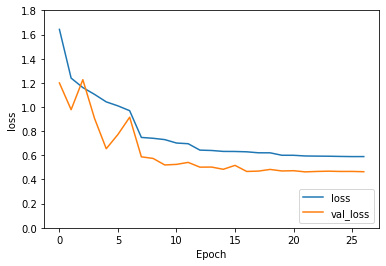

In [ ]:
graph_history('loss', 'val_loss', [0.0, 1.8])

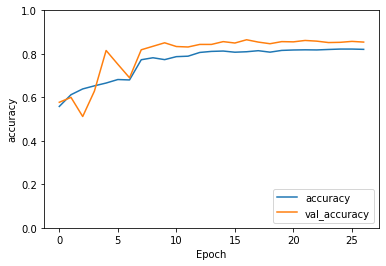

In [ ]:
graph_history('accuracy', 'val_accuracy', [0.0, 1.0])

*   Name : Oktavia Citra Resmi Rachmawati
*   Email : oktaviacitraaa@gmail.com
*   Source dataset : [Kaggle](https://www.kaggle.com/datasets/athu1105/book-genre-prediction)
